# Visualize ActualVsMarketActual

## 1. Read data from MySQL
### 1.1. Import important packages

In [15]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np

%matplotlib inline

### 1.2. Connect to MySQL database reconai

In [16]:
mydb = pymysql.connect(host='localhost',
                             user='root',
                             password='peacebro',database='reconai')
print(mydb)

### 1.3. Read data from database

In [17]:
sql_merged_sales='SELECT * FROM `merged_sales`;'
sql_merged_market_sales='SELECT * FROM `merged_market_sales`'

In [18]:
df_merged = pd.read_sql(sql_merged_sales, mydb)
df_market_merged = pd.read_sql(sql_merged_market_sales, mydb)

### 1.4. Convert Sales column to float

In [19]:
def sales_product(df):
    df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['Year', 'month', 'day']])+pd.to_timedelta(df.Week*7, unit='days')
    df['Sales'] = df['Sales'].str.replace(',', '')
    df['Sales'] = df['Sales'].astype(float)   
sales_product(df_merged)
sales_product(df_market_merged)

## 2. Graphs/Charts
### 2.1. Line graph for Total Sales
#### 2.1.1. Calculate Total Sales of PlanVsActual

In [20]:
def week_sum(df):
    newdf = pd.DataFrame(df,columns=['date'])
    def sum_scores(d):
        return df[(df['date']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['date'].transform(sum_scores)
    newdf.drop_duplicates(subset ="date", 
                     keep = "first", inplace = True) 
    return newdf
df_merged_total=week_sum(df_merged)
df_market_merged_total=week_sum(df_market_merged)
print(df_merged_total.head())
print(df_market_merged_total.head())

          date  Total Sales
0   2017-01-08  12267449.90
26  2017-01-15  12177502.05
52  2017-01-22  12163691.14
78  2017-01-29  12153865.33
104 2017-02-05  12227039.30
          date  Total Sales
0   2017-01-08  44004000.00
25  2017-01-15  44163236.10
50  2017-01-22  43798519.59
75  2017-01-29  44158814.74
100 2017-02-05  43832098.45


#### 2.1.2. Display Total Sales Line graph

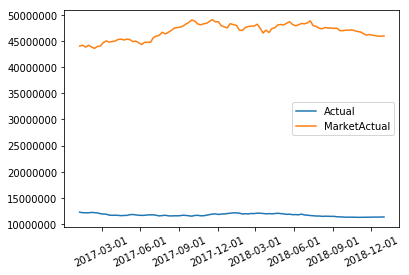

In [21]:
ax=plt.gca()
rcParams['figure.figsize'] = 10, 4
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks( rotation=25 )
ax=plt.gca()
ax.xaxis_date()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
plt.plot(df_merged_total['date'],df_merged_total['Total Sales'],label='Actual')
plt.plot(df_market_merged_total['date'],df_market_merged_total['Total Sales'],label='MarketActual')
ax.legend()
#plt.legend("Actual","Plan")
plt.show()

### 2.2. Pie chart for Category
#### 2.2.1. Calculate Category of PlanVsActual

In [22]:
"""Since only one category is given"""
df_category_actual_total=df_merged
df_category_actualmarket_total=df_market_merged
def category_sum(df):
    newdf = pd.DataFrame(df,columns=['Category'])
    def sum_scores(d):
        return df[(df['Category']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['Category'].transform(sum_scores)
    newdf.drop_duplicates(subset ="Category", 
                     keep = "first", inplace = True) 
    return newdf
df_category_actual_total=category_sum(df_category_actual_total)
df_category_actualmarket_total=category_sum(df_category_actualmarket_total)
print(df_category_actual_total,df_category_actualmarket_total)

  Category   Total Sales
0  Widgets  1.220182e+09   Category   Total Sales
0  Widgets  4.865448e+09


#### 2.2.2. Display Category Pie Chart

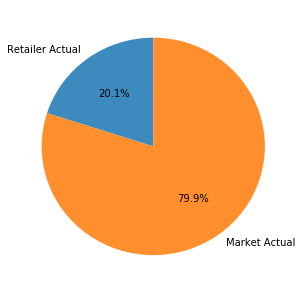

In [23]:
##colors=blue,orange
rcParams['figure.figsize'] = 5,5
plt.pie(x=[df_category_actual_total['Total Sales'],df_category_actualmarket_total['Total Sales']],
        colors=['#3D8ABE','#FF8F2D'], autopct='%.1f%%',labels=['Retailer Actual','Market Actual']
       ,startangle=90)
plt.show()

### 2.3. Pie chart for CPG Region
#### 2.3.1. Calculate Sales in all CPG Regions

In [24]:
df_region_actual_total=df_merged
df_region_marketactual_total=df_market_merged
def region_sum(df):
    newdf = pd.DataFrame(df,columns=['CPG Region'])
    def sum_scores(d):
        return df[(df['CPG Region']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['CPG Region'].transform(sum_scores)
    newdf.drop_duplicates(subset ="CPG Region", 
                     keep = "first", inplace = True) 
    return newdf
df_region_actual_total=region_sum(df_region_actual_total)
df_region_marketactual_total=region_sum(df_region_marketactual_total)
print(df_region_marketactual_total.head())
print(df_region_actual_total.head())


  CPG Region   Total Sales
0      North  1.339735e+09
1       East  8.522130e+08
2      South  9.653959e+08
4       West  1.708105e+09
  CPG Region   Total Sales
0      North  1.636065e+08
1       East  2.679695e+08
2      South  3.929235e+08
4       West  3.956830e+08


#### 2.3.2 Display CPG Region Pie Chart

([<matplotlib.patches.Wedge at 0x24fe14f1a90>,
 [Text(-0.0927943,1.09608,'Retailer North'),
  Text(-0.834007,0.717239,'Market North'),
  Text(-1.09213,-0.131335,'Retailer East'),
  Text(-0.842774,-0.706917,'Market East'),
  Text(-0.250843,-1.07102,'Retailer South'),
  Text(0.499296,-0.980155,'Market South'),
  Text(1.01444,-0.425341,'Retailer West'),
  Text(0.849057,0.699358,'Market West')],
 [Text(-0.0506151,0.597861,'2.7%'),
  Text(-0.454913,0.391221,'22.0%'),
  Text(-0.595708,-0.0716374,'4.4%'),
  Text(-0.459695,-0.385591,'14.0%'),
  Text(-0.136824,-0.584191,'6.5%'),
  Text(0.272343,-0.53463,'15.9%'),
  Text(0.55333,-0.232004,'6.5%'),
  Text(0.463122,0.381468,'28.1%')])

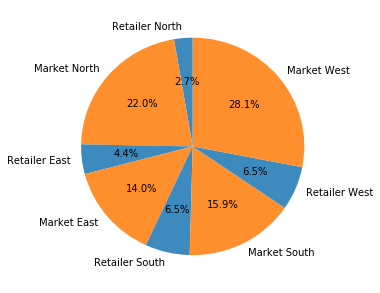

In [25]:
rcParams['figure.figsize'] = 5,5
df_north_region=df_region_actual_total.loc[df_region_actual_total['CPG Region']=='North']
df_east_region=df_region_actual_total.loc[df_region_actual_total['CPG Region']=='East']
df_south_region=df_region_actual_total.loc[df_region_actual_total['CPG Region']=='South']
df_west_region=df_region_actual_total.loc[df_region_actual_total['CPG Region']=='West']
df_north_marketregion=df_region_marketactual_total.loc[df_region_actual_total['CPG Region']=='North']
df_east_marketregion=df_region_marketactual_total.loc[df_region_actual_total['CPG Region']=='East']
df_south_marketregion=df_region_marketactual_total.loc[df_region_actual_total['CPG Region']=='South']
df_west_marketregion=df_region_marketactual_total.loc[df_region_actual_total['CPG Region']=='West']

df_east_region.reset_index(inplace=True)
df_south_region.reset_index(inplace=True)
df_west_region.reset_index(inplace=True)
df_east_marketregion.reset_index(inplace=True)
df_south_marketregion.reset_index(inplace=True)
df_west_marketregion.reset_index(inplace=True)

plt.pie(x=[df_north_region['Total Sales'],df_north_marketregion['Total Sales'],df_east_region['Total Sales']
          ,df_east_marketregion['Total Sales'],df_south_region['Total Sales'],df_south_marketregion['Total Sales']
          ,df_west_region['Total Sales'],df_west_marketregion['Total Sales']],
        labels=['Retailer North','Market North',
               'Retailer East','Market East',
               'Retailer South','Market South',
               'Retailer West','Market West'],
       colors=['#3D8ABE','#FF8F2D'],autopct='%.1f%%',startangle=90)

### 2.4. Pie chart for Retailer
#### 2.4.1. Calculate Sales in each Retailer

In [26]:
df_retailer_actual_total=df_merged
df_retailer_marketactual_total=df_market_merged
def retailer_sum(df):
    newdf = pd.DataFrame(df,columns=['Retailer'])
    def sum_scores(d):
        return df[(df['Retailer']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['Retailer'].transform(sum_scores)
    newdf.drop_duplicates(subset ="Retailer", 
                     keep = "first", inplace = True) 
    return newdf
df_retailer_actual_total=retailer_sum(df_retailer_actual_total)
df_retailer_marketactual_total=retailer_sum(df_retailer_marketactual_total)
df_retailer_actual_total.reset_index(inplace=True)
df_retailer_marketactual_total.reset_index(inplace=True)
df_retailer_marketactual_total.head()

,index,Retailer,Total Sales
0,0,SuperMart,1.851429e+09
1,9,BigCo,2.449486e+09
2,17,Rx,5.645331e+08


#### 2.4.2. Display Retailer Pie Chart

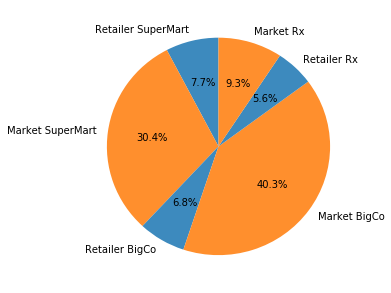

In [27]:
df_sm_retailer=df_retailer_actual_total.loc[df_retailer_actual_total['Retailer']=='SuperMart']
df_bc_retailer=df_retailer_actual_total.loc[df_retailer_actual_total['Retailer']=='BigCo']
df_rx_retailer=df_retailer_actual_total.loc[df_retailer_actual_total['Retailer']=='Rx']
df_sm_marketretailer=df_retailer_marketactual_total.loc[df_retailer_actual_total['Retailer']=='SuperMart']
df_bc_marketretailer=df_retailer_marketactual_total.loc[df_retailer_actual_total['Retailer']=='BigCo']
df_rx_marketretailer=df_retailer_marketactual_total.loc[df_retailer_actual_total['Retailer']=='Rx']

df_bc_retailer.reset_index(inplace=True)
df_rx_retailer.reset_index(inplace=True)
df_bc_marketretailer.reset_index(inplace=True)
df_rx_marketretailer.reset_index(inplace=True)

plt.pie(x=[df_sm_retailer['Total Sales'],df_sm_marketretailer['Total Sales'],df_bc_retailer['Total Sales']
          ,df_bc_marketretailer['Total Sales'],df_rx_retailer['Total Sales'],df_rx_marketretailer['Total Sales']],
        labels=['Retailer SuperMart','Market SuperMart',
               'Retailer BigCo','Market BigCo',
               'Retailer Rx','Market Rx'],
       colors=['#3D8ABE','#FF8F2D'],autopct='%.1f%%',startangle=90)

plt.show()